In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [77]:
df = pd.read_excel('Data for Modelling.xlsx')
#Take Raw Data as Xlsx File

In [78]:
df.head()

,Year,NOC,Country,DHE,GDP,PD,APE,AP,Home,Gold,Silver,Bronze,Medals
0,1992,ALG,Algeria,NaN,NaN,NaN,0.140078,36.0,0,1,0,1,2
1,1992,ARG,Argentina,NaN,2.287886e+11,12.251779,0.431907,111.0,0,0,0,1,1
2,1992,AUS,Australia,NaN,3.248843e+11,2.277313,1.517510,390.0,0,7,9,11,27
3,1992,AUT,Austria,NaN,1.417642e+10,94.946827,0.494163,127.0,0,0,2,0,2
4,1992,BAH,Bahamas,NaN,NaN,NaN,0.070039,18.0,0,0,0,1,1


In [79]:
df.shape

(541, 13)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     541 non-null    int64  
 1   NOC      541 non-null    object 
 2   Country  541 non-null    object 
 3   DHE      279 non-null    float64
 4   GDP      366 non-null    float64
 5   PD       378 non-null    float64
 6   APE      541 non-null    float64
 7   AP       541 non-null    float64
 8   Home     541 non-null    int64  
 9   Gold     541 non-null    int64  
 10  Silver   541 non-null    int64  
 11  Bronze   541 non-null    int64  
 12  Medals   541 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 55.1+ KB


In [81]:
df.describe()

,Year,DHE,GDP,PD,APE,AP,Home,Gold,Silver,Bronze,Medals
count,541.000000,279.000000,3.660000e+02,378.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,2004.665434,4.061971,7.461083e+11,222.037960,0.506248,147.001848,0.012939,3.659889,3.676525,4.179298,11.515712
std,7.882522,2.291834,2.061477e+12,868.535415,0.582300,168.193721,0.113116,7.104175,5.900156,6.229798,18.486187
min,1992.000000,0.342887,4.046000e+08,1.842548,0.009934,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1996.000000,2.120206,2.233836e+10,33.426033,0.119205,36.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,2004.000000,3.744384,1.274314e+11,79.934619,0.256667,77.000000,0.000000,1.000000,1.000000,2.000000,5.000000
75%,2012.000000,5.833714,4.752047e+11,126.940800,0.637874,180.000000,0.000000,3.000000,4.000000,5.000000,12.000000
max,2016.000000,10.948016,1.874508e+13,7908.720733,3.095941,839.000000,1.000000,51.000000,39.000000,38.000000,121.000000


In [82]:
df['DHE'].fillna(int(df['DHE'].mean()), inplace=True)
df['GDP'].fillna(int(df['GDP'].mean()), inplace=True)
df['PD'].fillna(int(df['PD'].mean()), inplace=True)

In [83]:
df.describe()

,Year,DHE,GDP,PD,APE,AP,Home,Gold,Silver,Bronze,Medals
count,541.000000,541.000000,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,2004.665434,4.031959,7.461083e+11,222.026523,0.506248,147.001848,0.012939,3.659889,3.676525,4.179298,11.515712
std,7.882522,1.644697,1.694837e+12,725.707025,0.582300,168.193721,0.113116,7.104175,5.900156,6.229798,18.486187
min,1992.000000,0.342887,4.046000e+08,1.842548,0.009934,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1996.000000,3.626486,4.812255e+10,55.831780,0.119205,36.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,2004.000000,4.000000,4.320519e+11,118.033289,0.256667,77.000000,0.000000,1.000000,1.000000,2.000000,5.000000
75%,2012.000000,4.000000,7.461083e+11,222.000000,0.637874,180.000000,0.000000,3.000000,4.000000,5.000000,12.000000
max,2016.000000,10.948016,1.874508e+13,7908.720733,3.095941,839.000000,1.000000,51.000000,39.000000,38.000000,121.000000


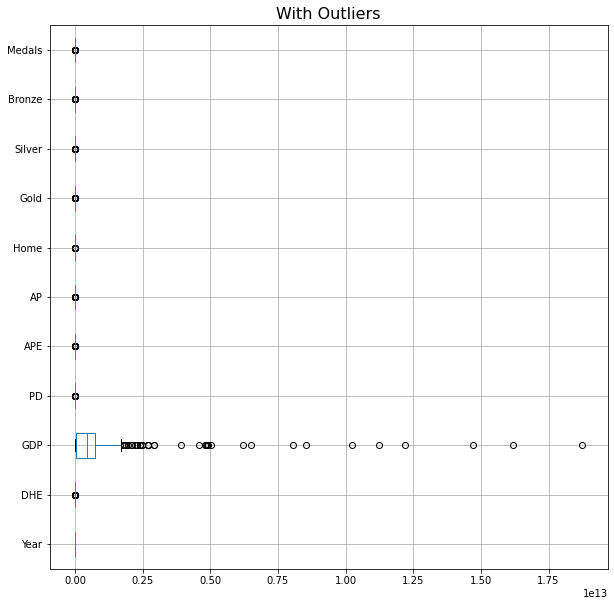

In [84]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool') & (df.dtypes!='object')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [85]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [86]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

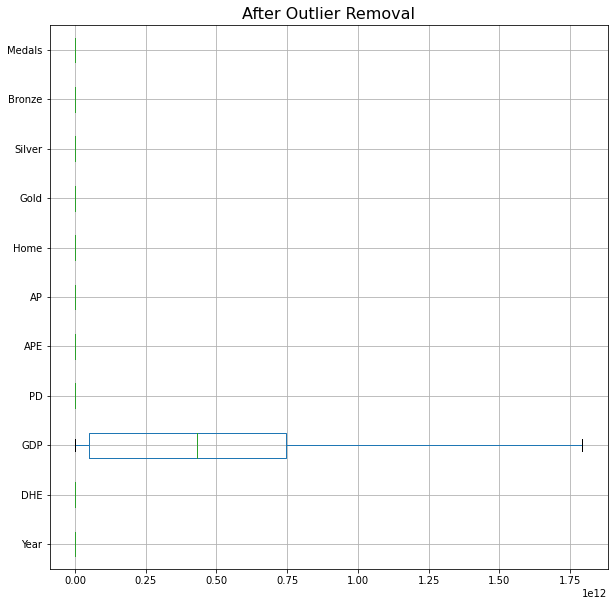

In [87]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [88]:
df.columns

Index(['Year', 'NOC', 'Country', 'DHE', 'GDP', 'PD', 'APE', 'AP', 'Home',
       'Gold', 'Silver', 'Bronze', 'Medals'],
      dtype='object')

In [89]:
df.head()

,Year,NOC,Country,DHE,GDP,PD,APE,AP,Home,Gold,Silver,Bronze,Medals
0,1992.0,ALG,Algeria,4.0,7.461083e+11,222.000000,0.140078,36.0,0.0,1.0,0.0,1.0,2.0
1,1992.0,ARG,Argentina,4.0,2.287886e+11,12.251779,0.431907,111.0,0.0,0.0,0.0,1.0,1.0
2,1992.0,AUS,Australia,4.0,3.248843e+11,2.277313,1.415876,390.0,0.0,7.0,9.0,11.0,27.0
3,1992.0,AUT,Austria,4.0,1.417642e+10,94.946827,0.494163,127.0,0.0,0.0,2.0,0.0,2.0
4,1992.0,BAH,Bahamas,4.0,7.461083e+11,222.000000,0.070039,18.0,0.0,0.0,0.0,1.0,1.0


In [90]:
df.drop('NOC', axis = 1, inplace = True)

In [91]:
df.drop('Country', axis = 1, inplace = True)

In [92]:
df.drop('Gold', axis = 1, inplace = True)

In [93]:
df.drop('Silver', axis = 1, inplace = True)

In [94]:
df.drop('Bronze', axis = 1, inplace = True)

In [95]:
df.head()

,Year,DHE,GDP,PD,APE,AP,Home,Medals
0,1992.0,4.0,7.461083e+11,222.000000,0.140078,36.0,0.0,2.0
1,1992.0,4.0,2.287886e+11,12.251779,0.431907,111.0,0.0,1.0
2,1992.0,4.0,3.248843e+11,2.277313,1.415876,390.0,0.0,27.0
3,1992.0,4.0,1.417642e+10,94.946827,0.494163,127.0,0.0,2.0
4,1992.0,4.0,7.461083e+11,222.000000,0.070039,18.0,0.0,1.0


In [96]:
df_train = df[df['Year'] != 2016]
df_test = df[df['Year'] == 2016]

In [97]:
df_test.head()

,Year,DHE,GDP,PD,APE,AP,Home,Medals
457,2016.0,4.000000,7.461083e+11,222.000000,0.241830,74.0,0.0,2.0
458,2016.0,4.560272,5.575314e+11,15.928135,0.758170,232.0,0.0,4.0
459,2016.0,3.066214,1.054614e+10,103.131261,0.111111,34.0,0.0,4.0
460,2016.0,4.560272,1.208847e+12,3.144936,1.415876,396.0,0.0,27.0
461,2016.0,4.560272,3.958374e+11,105.873340,0.277778,85.0,0.0,1.0


In [98]:
# Copy all the predictor variables into X dataframe
X_train = df_train.drop('Medals', axis=1)

# Copy target into the y dataframe. 
y_train = df_train[['Medals']]

In [99]:
y_train.head()

,Medals
0,2.0
1,1.0
2,27.0
3,2.0
4,1.0


In [100]:
# Copy all the predictor variables into X dataframe
X_test = df_test.drop('Medals', axis=1)

# Copy target into the y dataframe. 
y_test = df_test[['Medals']]

In [101]:
data_train = pd.concat([X_train,y_train],axis = 1) 
data_test = pd.concat([X_test,y_test],axis = 1) 
data_train.head()

,Year,DHE,GDP,PD,APE,AP,Home,Medals
0,1992.0,4.0,7.461083e+11,222.000000,0.140078,36.0,0.0,2.0
1,1992.0,4.0,2.287886e+11,12.251779,0.431907,111.0,0.0,1.0
2,1992.0,4.0,3.248843e+11,2.277313,1.415876,390.0,0.0,27.0
3,1992.0,4.0,1.417642e+10,94.946827,0.494163,127.0,0.0,2.0
4,1992.0,4.0,7.461083e+11,222.000000,0.070039,18.0,0.0,1.0


In [102]:
data_train.columns

Index(['Year', 'DHE', 'GDP', 'PD', 'APE', 'AP', 'Home', 'Medals'], dtype='object')

In [103]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [104]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.11066862105872621
The coefficient for DHE is -0.07248287401832502
The coefficient for GDP is 2.0643807729401096e-12
The coefficient for PD is -0.002586745145529927
The coefficient for APE is 13.934859777960323
The coefficient for AP is 0.0015625725352913105
The coefficient for Home is 0.0


In [105]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -220.16059147581075


In [106]:
regression_model.score(X_train, y_train)

0.6376780734530412

In [107]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.7507150469078312

In [108]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Medals ~ Year + DHE + GDP + PD + APE + AP + Home', data = data_train).fit()
lm1.params

Intercept   -2.201608e+02
Year         1.106687e-01
DHE         -7.248234e-02
GDP          2.064411e-12
PD          -2.586745e-03
APE          1.393486e+01
AP           1.562573e-03
Home         0.000000e+00
dtype: float64

In [109]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                 Medals   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     132.0
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           6.56e-96
Time:                        20:40:05   Log-Likelihood:                -1414.5
No. Observations:                 457   AIC:                             2843.
Df Residuals:                     450   BIC:                             2872.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -220.1608     93.639     -2.351      0.0

C:\Users\newpc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [110]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [111]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

4.227766160374732

In [112]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.7507150469078312

In [113]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

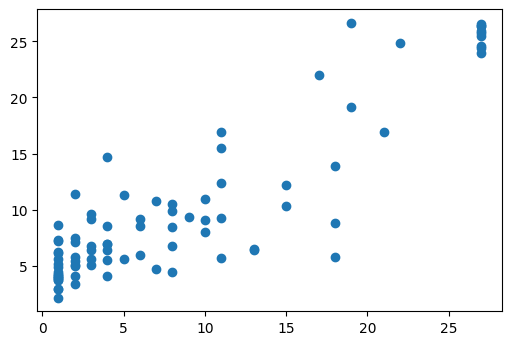

In [116]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.rcParams['figure.dpi'] = 100



plt.scatter(y_test['Medals'], y_pred)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 

C:\Users\newpc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [120]:
i=0
for column in X_train.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

Year ---> 67.10753838108032
DHE ---> 1.0771439049492484
GDP ---> 2.9440844908983483
PD ---> 1.1575914616413283
APE ---> 255.62821053554205
AP ---> 257.0549615162415
Home ---> nan


In [130]:
df_train.to_excel('Train_dataSet.xlsx',index = False, sheet_name = 'Train')

In [131]:
df_test.to_excel('Test_dataSet.xlsx',index = False, sheet_name = 'Test')

# NEW

In [121]:
from sklearn import linear_model

In [122]:
# create linear regression object
reg = LinearRegression()

In [123]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [124]:
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [[ 1.10668621e-01 -7.24828740e-02  2.06438077e-12 -2.58674515e-03
   1.39348598e+01  1.56257254e-03  0.00000000e+00]]


In [125]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.7507150469078312


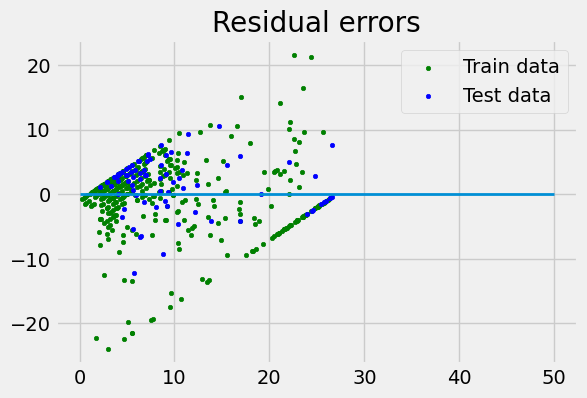

In [126]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
## plotting legend
plt.legend(loc = 'upper right')
## plot title
plt.title("Residual errors")
## method call for showing the plot
plt.show()

In [127]:
y_prediction =  reg.predict(X_test)

In [128]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is 0.7507150469078312
mean_sqrd_error is== 17.874006706809705
root_mean_squared error of is== 4.227766160374732


In [129]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,4),i),end=' ')

(-220.1608) * Intercept + (0.1107) * Year + (-0.0725) * DHE + (0.0) * GDP + (-0.0026) * PD + (13.9349) * APE + (0.0016) * AP + (0.0) * Home + 

### Thank You